In [1]:
!date

Sun Jan 22 19:33:39 PST 2023


In [2]:
!echo $CONDA_PREFIX 

/c4/home/derek/miniconda3/envs/squint_2


In [3]:
import sys
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scanpy as sc

In [4]:
#!conda install --yes --prefix {sys.prefix}  -c conda-forge adjusttext 

In [5]:
input_dir= '/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/'


In [6]:
output_dir = '/c4/home/derek/data1/derek/scSLR/notebooks/fig3/plots/'
os.makedirs(output_dir, exist_ok=True)

In [7]:
adata = sc.read_h5ad(input_dir+'./scANVI_label.h5ad')

/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


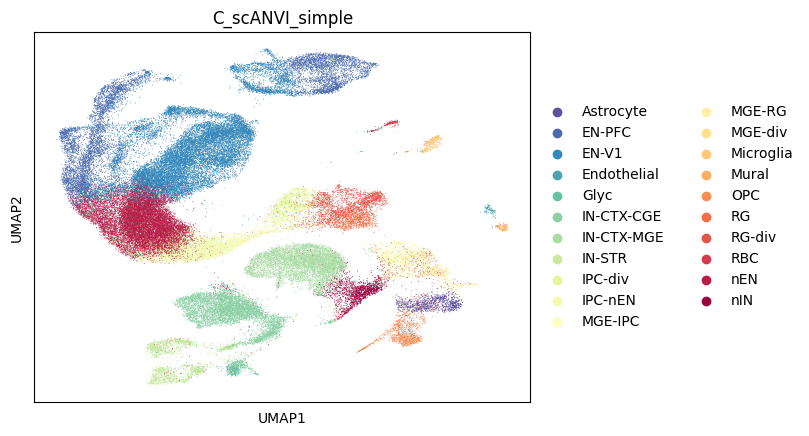

In [8]:
sc.pl.umap(adata,
          color='C_scANVI_simple',
          palette='Spectral_r')

AnnData object with n_obs × n_vars = 74327 × 36385
    obs: 'n_counts', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_mito', '_scvi_batch', '_scvi_labels', 'leiden', 'scANVI_simple', 'tech', 'C_scANVI', 'C_scANVI_simple'
    var: 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'C_scANVI_simple_colors', '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


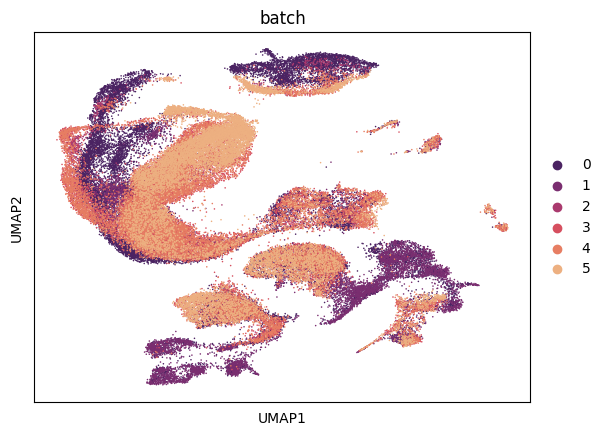

In [37]:
sc.pl.umap(adata,
          color='batch',
          palette='flare_r',
           s=5
          )

In [9]:
##from ivirshup, https://github.com/scverse/scanpy/issues/1513

from adjustText import adjust_text

def gen_mpl_labels(
    adata, groupby, exclude=(), ax=None, adjust_kwargs=None, text_kwargs=None
):
    if adjust_kwargs is None:
        adjust_kwargs = {"text_from_points": False}
    if text_kwargs is None:
        text_kwargs = {}

    medians = {}

    for g, g_idx in adata.obs.groupby(groupby).groups.items():
        if g in exclude:
            continue
        medians[g] = np.median(adata[g_idx].obsm["X_umap"], axis=0)

    if ax is None:
        texts = [
            plt.text(x=x, y=y, s=k, **text_kwargs) for k, (x, y) in medians.items()
        ]
    else:
        texts = [ax.text(x=x, y=y, s=k, **text_kwargs) for k, (x, y) in medians.items()]

    adjust_text(texts, **adjust_kwargs)

with plt.rc_context({"figure.figsize": (8, 8), "figure.dpi": 300, "figure.frameon": True}):
    ax = sc.pl.umap(adata, color='C_scANVI_simple', show=False, legend_loc=None, title=' ', frameon=True, size=20)
    gen_mpl_labels(
        adata,
        'C_scANVI_simple',
        exclude=("None",),  # This was before we had the `nan` behaviour
        ax=ax,
        #adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
        text_kwargs=dict(fontsize=12,fontweight='heavy'),
    )
    
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    

    fig = ax.get_figure()
    fig.tight_layout()

#    plt.savefig(output_dir+'UMAP_celltype.pdf')
    plt.show()

ModuleNotFoundError: No module named 'adjustText'